In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

data = np.load("noise_spectrums/seismic_mean.npz")
f = data["f"]
seismic = data["data"]

log_interp = scipy.interpolate.interp1d(f, np.log10(seismic), fill_value="extrapolate")

f_ = np.logspace(-3, 2, 1024)
seismic_interp = 10**log_interp(f_)

In [30]:
import kontrol

fit = kontrol.curvefit.spectrum_fit(f=f_, spectrum=seismic_interp, nzero=6, npole=8)

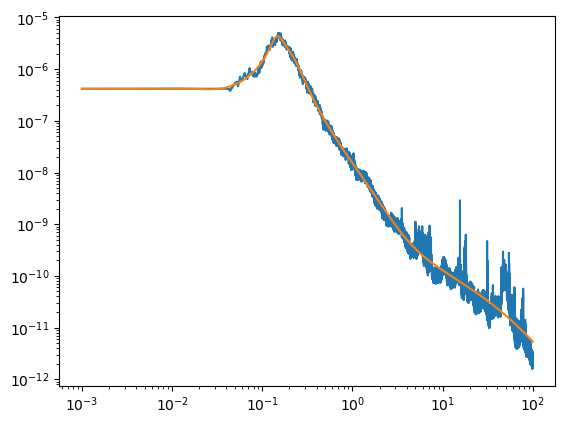

In [31]:
plt.loglog(f, seismic)
plt.loglog(f, abs(fit(1j*2*np.pi*f)))

In [33]:
print(fit.den[0][0])

[1.00000000e+00 3.11094781e+02 3.29473742e+03 5.05959634e+03
 1.01203801e+04 6.25012808e+03 5.72272730e+03 1.01503197e+03
 7.42056585e+01]


In [10]:
n_data = int(512*4096)
nperseg = 524288
data = np.random.normal(loc=0, scale=1, size=n_data)
f__, _ = scipy.signal.welch(data, fs=512, nperseg=nperseg)


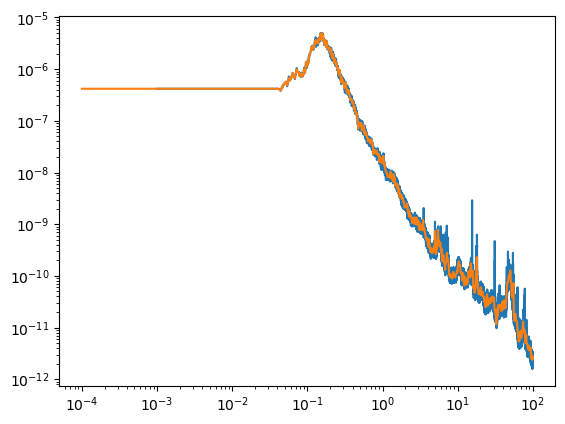

In [8]:
plt.loglog(f, seismic)
plt.loglog(f_, seismic_interp)